In [2]:
import os
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
label_dict={0:'肿瘤',1:'肿瘤和间质',2:'间质',3:'正常'}

In [4]:
#已经存在train.test,可以不执行
DIRECTORY='D:\\doctorUnet\\data\\result\\[1,0,0]'
f = open('D:\\doctorUnet\\data\\result\\[1,0,0]\\[1,0,0].txt','w')

files=os.listdir(DIRECTORY)
for file in files:
    f.writelines(file+ '--' + '0')
    f.write('\n')
f.close()

DIRECTORY='D:\\doctorUnet\\data\\result\\[1,1,0]'
f = open('D:\\doctorUnet\\data\\result\\[1,1,0]\\[1,1,0].txt','w')

files=os.listdir(DIRECTORY)
for file in files:
    f.writelines(file+ '--' + '1')
    f.write('\n')
f.close()

DIRECTORY='D:\\doctorUnet\\data\\result\\[0,1,0]'
f = open('D:\\doctorUnet\\data\\result\\[0,1,0]\\[0,1,0].txt','w')

files=os.listdir(DIRECTORY)
for file in files:
    f.writelines(file+ '--' + '2')
    f.write('\n')
f.close()

DIRECTORY='D:\\doctorUnet\\data\\result\\[0,0,1]'
f = open('D:\\doctorUnet\\data\\result\\[0,0,1]\\[0,0,1].txt','w')

files=os.listdir(DIRECTORY)
for file in files:
    f.writelines(file+ '--' + '3')
    f.write('\n')
f.close()

In [5]:
DIRECTORY='D:\\doctorUnet\\data\\result\\all'
f = open('D:\\doctorUnet\\data\\result\\all\\train.txt','r')
list=[]
for i in range(0,5246):
    list.append(i)
random.shuffle(list)
num=[]
imgs=[]
line=f.readline()
while line:
    a = line.split('--')
    data = a[0]
    imgs.append(data)
    
    label = a[1][0]
    num.append(label)
    line = f.readline()
f.close()

In [6]:
batch=[]
labels=[]
a=int(len(list)*0.9)
for j in range(0,a):
    num_1=list[j]
    file_path=DIRECTORY+"\\"+imgs[num_1]
    img=cv2.imread(file_path)
    img=cv2.resize(img,(224,224),interpolation=cv2.INTER_CUBIC)
    batch.append(img)
    labels.append(num[num_1])
    
batch_test=[]
labels_test=[]
for j in range(a,len(list)):
    num_1=list[j]
    file_path=DIRECTORY+"\\"+imgs[num_1]
    img=cv2.imread(file_path)
    img=cv2.resize(img,(224,224),interpolation=cv2.INTER_CUBIC)
    batch_test.append(img)
    labels_test.append(num[num_1])

In [7]:
x_train = np.array(batch)
y_train=np.array(labels)
x_test=np.array(batch_test)
y_test=np.array(labels_test)

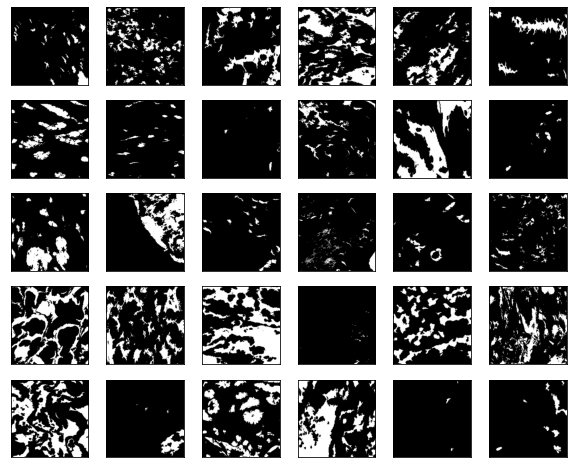

In [8]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [9]:
x_train=x_train.astype('float32')/255.0
y_train=y_train.astype(np.uint)
x_test=x_test.astype('float32')/255.0
y_test=y_test.astype(np.uint)

In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [13]:
model = ResNet50(weights=None)

In [14]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
logdir='./logs'
checkpoint_path='./checkpoint/resnet50{epoch:02d}.ckpt'
#下一步将callbacks带入到model.fit中
callbacks=[
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,#是否只存参数W和b
                                       verbose=1,
                                       save_freq=1000) 
]

In [21]:
lastest='./checkpoint\\resnet50.ckpt'
model.load_weights(lastest)

In [ ]:
train_history=model.fit(x_train,y_train,
                        validation_split=0.1,
                       epochs=20,
                       batch_size=5,
                       callbacks=callbacks,#保存
                       verbose=2)

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print('accuracy ',test_acc)

17/17 - 22s - loss: 1.0553 - accuracy: 0.5086
accuracy  0.508571445941925


In [20]:
preds=model.predict(x_test)
np.argmax(preds,axis=1)

array([[3.0253571e-01, 3.4350014e-01, 3.3334407e-01, ..., 2.2521560e-10,
        2.4015537e-10, 2.3487157e-10],
       [3.2554930e-01, 3.3090106e-01, 3.0800217e-01, ..., 2.4184956e-09,
        2.5527505e-09, 2.5164306e-09],
       [3.4818509e-01, 3.5341638e-01, 2.3037556e-01, ..., 2.1255664e-09,
        2.2770490e-09, 2.2252731e-09],
       ...,
       [3.0780181e-01, 3.3136743e-01, 3.2947144e-01, ..., 5.4208495e-09,
        5.6627623e-09, 5.5885536e-09],
       [2.3044790e-01, 2.7627602e-01, 5.7325765e-02, ..., 7.5919042e-11,
        9.4284393e-11, 8.6682425e-11],
       [2.7049786e-01, 3.0169573e-01, 4.0875259e-01, ..., 1.1383645e-09,
        1.2002950e-09, 1.1734074e-09]], dtype=float32)

In [19]:
y_test

array([0, 2, 2, 1, 0, 0, 3, 0, 3, 0, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 0,
       2, 0, 1, 2, 1, 3, 0, 1, 3, 2, 2, 3, 0, 2, 1, 0, 1, 3, 3, 3, 1, 3,
       1, 0, 2, 2, 3, 1, 0, 0, 0, 3, 3, 0, 2, 0, 1, 2, 1, 3, 1, 3, 0, 0,
       2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 3, 1, 2, 1, 1, 1, 3, 0, 0, 0,
       2, 1, 2, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 1, 0, 0, 0, 2, 1, 3, 0,
       0, 1, 3, 2, 2, 0, 0, 1, 1, 0, 1, 3, 1, 3, 0, 0, 1, 0, 2, 3, 3, 3,
       3, 0, 1, 2, 2, 2, 1, 1, 3, 1, 1, 0, 2, 3, 2, 2, 0, 2, 1, 0, 3, 1,
       1, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 3, 1, 3, 1, 0, 3, 0, 2, 2,
       0, 0, 3, 3, 3, 1, 2, 0, 1, 3, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 2, 3, 3, 1, 3, 1, 2, 0, 2, 0, 1, 2, 2, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 2, 3, 0, 0, 3, 2, 0, 3, 0, 2, 0, 2, 0, 2, 2,
       3, 3, 3, 2, 3, 2, 1, 1, 0, 3, 2, 3, 0, 0, 1, 0, 0, 1, 3, 2, 1, 3,
       1, 3, 3, 0, 3, 3, 1, 2, 2, 3, 3, 2, 3, 0, 0, 2, 3, 3, 3, 0, 2, 3,
       3, 0, 2, 0, 0, 1, 1, 3, 2, 1, 2, 1, 0, 3, 3,